In [1]:
import torch
# choosing gpu as computational device if gpu is available
# since we are working with small data this step is not necessary indeed
# but i own the repo and do whatever i want... just joking doing it for fun im really stressed out


# MPS: Metal Performance Shaders --> for Mac devices with M chips
# CUDA: For device with cuda support
# CPU: General case
# if torch.cuda.is_available():
#     device = torch.device("cuda")
# elif torch.backends.mps.is_available():
#     device = torch.device("mps")
# else:
#     device = torch.device("cpu")
    
generator = torch.Generator()
seed = 20040324
generator.manual_seed(seed)

words = open('/Users/ezelbayraktar/Documents/DL-NLP/MyLanguageModelJourney/names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [2]:
#getting chars 
chars = sorted(list(set(''.join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [3]:
## implementing a dictionary to enum chars
ctoi={}
ctoi['.'] = 0
i = 1
for char in chars:
    # i do not check if char is in ctoi since chars is already a set so no dupes
    # so it is not possible that char is added to ctos twice
    ctoi[char] = i
    i+=1
ctoi['.']

0

In [4]:
## implementing a dictionary to char nums

## just flipping ctoi since itoc is just the same but with keys and values exchanged
itoc = {value: key for key, value in ctoi.items()}
itoc[0]

'.'

In [5]:
## building ...
import torch
gram = 3
X,Y = [],[]
for w in words:
    #print(w)
    grams = [0]*gram
    for ch in w+'.':
        cai = ctoi[ch] ## cai stands for character as integer
        X.append(grams)
        Y.append(cai)
        #print(itoc[grams[0]],itoc[grams[1]],itoc[grams[2]]," >> ",itoc[cai])
        ##print(ch,cai)
        grams = grams[1:] + [cai]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [6]:
data_size = X.shape[0]
data_random_indices = torch.randperm(data_size)
data_random_indices

tensor([185845,  97520,  19937,  ..., 179664,   5743, 201061])

In [7]:
train_size = 0.8
#train_indices_of_rows = torch.randint(0, data_size ,data_size * train_size, generator=generator)
train_indices_of_rows = data_random_indices[:int(train_size*data_size)]
X_train = X[train_indices_of_rows]
Y_train = Y[train_indices_of_rows]

In [8]:
validation_size = 0.1
#validation_indices_of_rows = torch.randint(0, data_size ,data_size * validation_size, generator=generator)
validation_indices_of_rows = data_random_indices[int(train_size*data_size):int((validation_size+train_size)*data_size)]
X_valid = X[validation_indices_of_rows]
Y_valid = Y[validation_indices_of_rows]

In [9]:
evaluation_size = 0.1
#evalutation_indices_of_rows = torch.randint(0, data_size ,data_size * evaluation_size, generator=generator)
evalutation_indices_of_rows = data_random_indices[int((validation_size+train_size)*data_size):]
X_eval = X[evalutation_indices_of_rows]
Y_eval = Y[evalutation_indices_of_rows]

In [10]:

# Print shapes
print("Shapes:")
print(f"X_train: {X_train.shape}")
print(f"Y_train: {Y_train.shape}")
print(f"X_valid: {X_valid.shape}")
print(f"Y_valid: {Y_valid.shape}")
print(f"X_eval: {X_eval.shape}")
print(f"Y_eval: {Y_eval.shape}")



Shapes:
X_train: torch.Size([182516, 3])
Y_train: torch.Size([182516])
X_valid: torch.Size([22815, 3])
Y_valid: torch.Size([22815])
X_eval: torch.Size([22815, 3])
Y_eval: torch.Size([22815])


In [11]:
# X_train = X_train.to(device)
# Y_train = Y_train.to(device)
# X_valid = X_valid.to(device)
# Y_valid = Y_valid.to(device)
# X_eval = X_eval.to(device)
# Y_eval = Y_eval.to(device)


rows = 27 #  english chars + the dot
dimension = 10 # dimensions for each char
dimensions = torch.randn(rows, dimension, generator=generator)
dimensions
# params are the dimension values our model assigns to characters

tensor([[ 0.0683, -0.3570, -0.4303, -0.2795,  1.1312, -0.0754, -2.0496,  0.7462,
         -0.1661, -0.0568],
        [-1.1872, -0.8173,  1.4278, -0.3219, -0.1768, -0.1670, -0.2226,  0.5139,
          0.6991,  0.7423],
        [-1.0318,  0.6355, -0.7301, -1.0503, -0.4305, -0.2259,  0.3296,  2.2490,
         -0.1233, -0.3759],
        [ 0.3918, -0.6880,  0.3937,  0.3894, -0.8212, -0.5815, -1.5138, -0.6488,
          1.4601,  0.0655],
        [ 0.1458, -0.2901,  0.2604, -0.2802,  0.3193, -1.5792,  0.4424,  0.1094,
          0.6861,  1.0459],
        [ 0.8097, -1.3159,  1.3181, -1.1194, -2.4727,  0.1153,  0.0430, -0.7017,
          0.6018, -0.8158],
        [-0.1015,  0.0766, -0.0466, -0.4807,  0.2152, -0.6514, -1.0142, -1.9668,
         -0.6928,  0.3195],
        [ 0.8701, -0.6555, -0.8817, -1.7050,  1.4939, -0.7213,  0.9808, -0.9988,
         -0.2021, -0.1600],
        [ 1.5585,  2.1921,  0.3221, -0.6525,  0.1620, -0.1199,  1.5351,  0.8613,
          1.8042,  1.8288],
        [-1.0050, -

In [12]:
dimensions[X].shape

torch.Size([228146, 3, 10])

In [13]:
# here we still have the gram table actually but each character in each gram is repsrented with dimenstional params
#->> dimensions[X]
embedded = dimensions[X] 
embedded

tensor([[[ 0.0683, -0.3570, -0.4303,  ...,  0.7462, -0.1661, -0.0568],
         [ 0.0683, -0.3570, -0.4303,  ...,  0.7462, -0.1661, -0.0568],
         [ 0.0683, -0.3570, -0.4303,  ...,  0.7462, -0.1661, -0.0568]],

        [[ 0.0683, -0.3570, -0.4303,  ...,  0.7462, -0.1661, -0.0568],
         [ 0.0683, -0.3570, -0.4303,  ...,  0.7462, -0.1661, -0.0568],
         [ 0.8097, -1.3159,  1.3181,  ..., -0.7017,  0.6018, -0.8158]],

        [[ 0.0683, -0.3570, -0.4303,  ...,  0.7462, -0.1661, -0.0568],
         [ 0.8097, -1.3159,  1.3181,  ..., -0.7017,  0.6018, -0.8158],
         [ 0.4684, -1.2707, -0.2099,  ..., -0.1080, -0.3437, -0.1431]],

        ...,

        [[ 0.0643, -1.8099,  0.9281,  ..., -0.3422,  0.2602, -0.1008],
         [ 0.0643, -1.8099,  0.9281,  ..., -0.3422,  0.2602, -0.1008],
         [ 1.2350, -1.1325, -1.1650,  ..., -0.3953,  1.3377,  0.3334]],

        [[ 0.0643, -1.8099,  0.9281,  ..., -0.3422,  0.2602, -0.1008],
         [ 1.2350, -1.1325, -1.1650,  ..., -0.3953,  1.

In [14]:
class layer():
    def __init__(self, input_size, output_size):
        self.weights = torch.randn(input_size, output_size, requires_grad=True, generator=generator)
        self.bias = torch.randn(output_size, requires_grad=True, generator=generator)
        
    def __call__(self, x):
        return torch.tanh(x @ self.weights + self.bias)
    
    def parameters(self):
        return [self.weights, self.bias]
    
    def zero_grad(self):
        self.weights.grad = None
        self.bias.grad = None

In [15]:
# inputNumberLayer1 = (embedded.shape)[2]*(embedded.shape)[1] # input nummber is equal to (grams count) * (dimensions)
# neuronsLayer1 = 200 # matter of choice CAUTION: too much neurons may cause overfitting

# W1 = torch.randn(inputNumberLayer1, neuronsLayer1, generator=generator, device=device) # first layer's weights
# b1 = torch.randn(200,generator=generator, device=device)

# activation1 = torch.tanh(emb.view(emb.shape[0],emb.shape[1] * emb.shape[2]) @ W1 + b1)

# W2 = torch.randn(200,27,generator=generator, device=device)
# b2 = torch.randn(27,generator=generator, device=device)

# activation2 = torch.tanh(activation1 @ W2 + b2)

# W3 = torch.randn(140,27,generator=generator, device=device)
# b3 = torch.randn(27,generator=generator, device=device)

# activation3 = torch.tanh(activation2 @ W3 + b3)

# W4 = torch.randn(90,27,generator=generator, device=device)
# b4 = torch.randn(27,generator=generator, device=device)

# activation3 = torch.tanh(activation2 @ W4 + b4)
fi = gram*dimension
layer1 = layer(fi, 100)
layer2 = layer(100, 27)

layers = [layer1, layer2]


In [16]:
lr = torch.linspace(-3,0,1000)
lre = 10 ** lr
lre

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [17]:
# WE NEED TO RESHAPE DIMENSIONS SO MATRIX MULTIPLICATION GETS TO BE POSSIBLE
# WEIGHTS ARE 2D WHILE INDEXED DIMENSIONS(EMBEDDED) ARE 3D
# weights are seen to be 2d in the weights class
embedded.shape

torch.Size([228146, 3, 10])

In [18]:
# i used a more complex and inefficient way to reconstruct dimensions previously but sice pytorch stores everything as 1D anyway, 
# lets just change the view of the 

Iteration 0: 2.8268706798553467
Iteration 500: 2.8210561275482178
Iteration 1000: 2.847076654434204
Iteration 1500: 2.829538345336914
Iteration 2000: 2.8226559162139893
Iteration 2500: 2.8268556594848633
Iteration 3000: 2.8262758255004883
Iteration 3500: 2.80806303024292
Iteration 4000: 2.8061399459838867
Iteration 4500: 2.8029627799987793
Iteration 5000: 2.7993123531341553
Iteration 5500: 2.79803466796875
Iteration 6000: 2.7689573764801025
Iteration 6500: 2.791922092437744
Iteration 7000: 2.78064227104187
Iteration 7500: 2.789646625518799
Iteration 8000: 2.7858777046203613
Iteration 8500: 2.7782347202301025
Iteration 9000: 2.777695894241333
Iteration 9500: 2.7705183029174805
Iteration 10000: 2.7768208980560303
Iteration 10500: 2.782006025314331
Iteration 11000: 2.771512508392334
Iteration 11500: 2.76467227935791
Iteration 12000: 2.764726161956787
Iteration 12500: 2.779752731323242
Iteration 13000: 2.7643613815307617
Iteration 13500: 2.761319398880005
Iteration 14000: 2.768513679504394

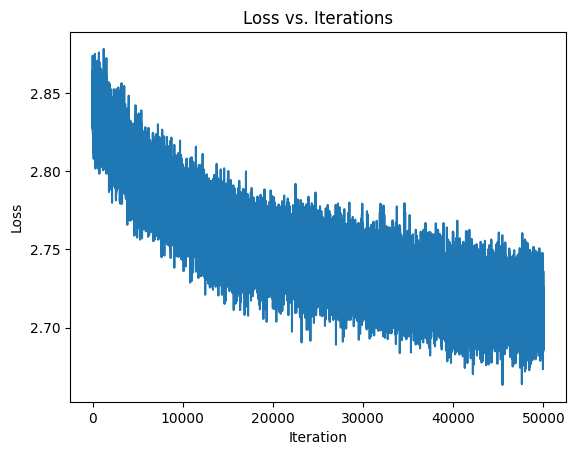

In [26]:
import time
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# Initialize lists to store loss values and iteration numbers
loss_values = []
iterations = []

batch_size = 4000

# Assuming 'layers' is a list of your custom layer objects, you need to modify
# the layer class to ensure all operations are done on the specified device.
# For now, we'll assume layers and dimensions are moved to the correct device outside this snippet.

# Start the timer
start_time = time.time()

# Training loop
for iter in range(50000):
    # if iter > 4000:
    #     lr = 0.001
    # elif iter > 2500:
    #     lr = 0.01
    # else:
    #     lr = 0.1
    lr = 0.1
    batch_indexes = torch.randint(0, X_train.shape[0], (batch_size,))
    embedded = dimensions[X_train[batch_indexes]]
    embedded = embedded.view(embedded.shape[0], embedded.shape[1] * embedded.shape[2])
    
    for layer in layers:
        embedded = layer(embedded)

    logits = embedded
    targets = Y_train[batch_indexes]
    loss = F.cross_entropy(logits, targets)
    
    # Store loss value and iteration number
    loss_values.append(loss.item())
    iterations.append(iter)
    
    if iter % 500 == 0:
        print(f'Iteration {iter}: {loss.item()}')
    
    # Zero gradients, perform a backward pass, and update
    for layer in layers:
        layer.zero_grad()
    loss.backward()
    with torch.no_grad():
        for layer in layers:
            for param in layer.parameters():
                param -= lr * param.grad

# Print time elapsed
end_time = time.time()
print(f"Time elapsed: {end_time - start_time} seconds")

# Plot loss graph
plt.plot(iterations, loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()


In [27]:

embedded = dimensions[X_valid] 
embedded = embedded.view(embedded.shape[0] , embedded.shape[1]*embedded.shape[2])

for layer in layers:
    embedded = layer(embedded)

logits = embedded
targets = Y_valid
loss = F.cross_entropy(logits, targets)
loss

tensor(2.7291, grad_fn=<NllLossBackward0>)

In [30]:


# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * gram # initialize with all ...
    while True:
      emb = dimensions[torch.tensor([context])] # (1,block_size,d)
      emb = emb.view(1, -1)
      for layer in layers:
          emb = layer(emb)

      logits = emb
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itoc[i] for i in out))

carmahxqae.
hqrifkimlix.
thtyrnncaysnejrzhnenfeperahc.
irqei.
nermniahcmriiv.
usleigph.
bmh.
din.
qbijnisnlilea.
jaebq.
wqathrg.
jaryxixfh.
eepiusai.
ed.
ediia.
gtleleyifl.
uarae.
bvljhksyainmqqosozerjrojn.
irlairoenekp.
sadlnuo.
